In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
data['Male']=pd.get_dummies(data['sex'],drop_first = True)

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [11]:
data.tail()

,age,sex,bmi,children,smoker,region,charges,Male
1333,50,male,30.97,3,no,northwest,10600.5483,1
1334,18,female,31.92,0,no,northeast,2205.9808,0
1335,18,female,36.85,0,no,southeast,1629.8335,0
1336,21,female,25.80,0,no,southwest,2007.9450,0
1337,61,female,29.07,0,yes,northwest,29141.3603,0


In [13]:
data.drop(['sex'],axis=True)

,age,bmi,children,smoker,region,charges,Male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


In [14]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [15]:
df = pd.get_dummies(data['region'],drop_first = True)

In [16]:
df

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [17]:
dat = [data,df]

In [18]:
DF = pd.concat(dat,axis = 1)

In [19]:
DF.head()

,age,sex,bmi,children,smoker,region,charges,Male,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0


In [20]:
DF.drop(['sex','region'],axis=1,inplace=True)

In [21]:
DF.head()

,age,bmi,children,smoker,charges,Male,northwest,southeast,southwest
0,19,27.900,0,yes,16884.92400,0,0,0,1
1,18,33.770,1,no,1725.55230,1,0,1,0
2,28,33.000,3,no,4449.46200,1,0,1,0
3,33,22.705,0,no,21984.47061,1,1,0,0
4,32,28.880,0,no,3866.85520,1,1,0,0


In [22]:
DF['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [23]:
DF['Smoke']=pd.get_dummies(DF['smoker'],drop_first=True)

In [24]:
DF.drop(['smoker'],axis=1,inplace=True)

In [25]:
DF.head()

,age,bmi,children,charges,Male,northwest,southeast,southwest,Smoke
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [26]:
DF.corr()

,age,bmi,children,charges,Male,northwest,southeast,southwest,Smoke
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.000407,-0.011642,0.010016,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,-0.135996,0.270025,-0.006205,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.024806,-0.023066,0.021914,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,-0.039905,0.073982,-0.043210,0.787251
Male,-0.020856,0.046371,0.017163,0.057292,1.000000,-0.011156,0.017117,-0.004184,0.076185
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,1.000000,-0.346265,-0.320829,-0.036945
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,-0.346265,1.000000,-0.346265,0.068498
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.320829,-0.346265,1.000000,-0.036945
Smoke,-0.025019,0.003750,0.007673,0.787251,0.076185,-0.036945,0.068498,-0.036945,1.000000


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

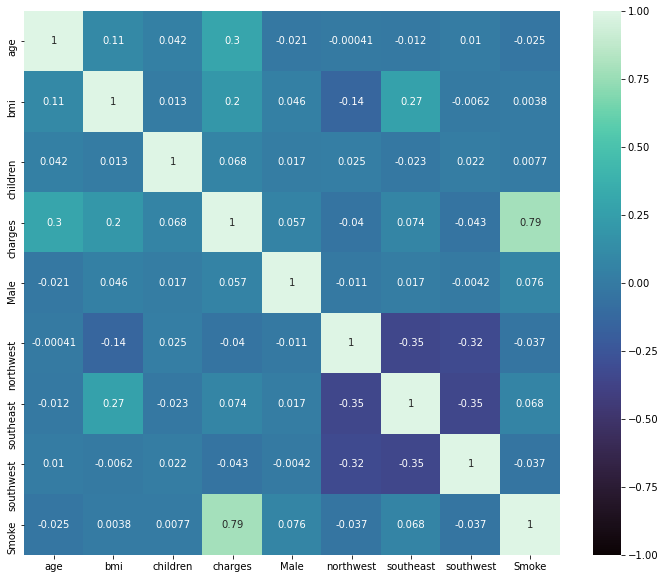

In [28]:
corr = DF.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [54]:
X=data.iloc[:,2:3].values
X

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [76]:
y = data.iloc[:,0].values
y

array([19, 18, 28, ..., 18, 21, 61])

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred = lr.predict(X_test)

In [83]:
y_test

array([18, 46, 33, 59, 44, 50, 61, 51, 56, 29, 53, 28, 63, 25, 48, 41, 61,
       21, 23, 35, 37, 43, 19, 19, 47, 43, 62, 43, 46, 54, 48, 33, 47, 39,
       42, 18, 25, 30, 18, 50, 30, 18, 20, 26, 34, 33, 41, 33, 43, 23, 62,
       18, 44, 29, 46, 41, 30, 20, 32, 44, 55, 43, 32, 39, 38, 43, 38, 49,
       63, 57, 28, 40, 24, 57, 39, 37, 44, 50, 52, 53, 34, 49, 21, 33, 19,
       63, 24, 50, 52, 34, 59, 19, 54, 46, 42, 42, 58, 21, 25, 61, 64, 61,
       48, 25, 59, 51, 55, 33, 52, 29, 27, 60, 40, 63, 53, 62, 43, 52, 44,
       27, 43, 64, 36, 38, 19, 36, 50, 45, 58, 39, 51, 53, 26, 47, 37, 18,
       56, 22, 52, 33, 25, 28, 29, 45, 61, 29, 25, 36, 19, 54, 22, 23, 31,
       43, 58, 64, 60, 36, 38, 19, 20, 33, 38, 26, 31, 21, 29, 19, 19, 20,
       47, 19, 64, 44, 33, 46, 49, 31, 50, 58, 52, 63, 57, 40, 26, 35, 19,
       18, 56, 61, 24, 30, 19, 33, 19, 62, 29, 38, 57, 38, 56, 37, 46, 40,
       51, 64, 21, 36, 18, 63, 19, 55, 58, 59, 18, 54, 25, 51, 58, 57, 50,
       61, 63, 42, 41, 56

In [84]:
lr.score(X_train, y_train)
X_train

array([[45.32 ],
       [28.93 ],
       [43.4  ],
       [31.35 ],
       [32.205],
       [19.95 ],
       [19.8  ],
       [26.695],
       [18.6  ],
       [26.98 ],
       [23.76 ],
       [22.515],
       [26.4  ],
       [32.965],
       [29.26 ],
       [30.59 ],
       [33.06 ],
       [33.44 ],
       [22.42 ],
       [26.125],
       [29.7  ],
       [35.2  ],
       [34.9  ],
       [22.6  ],
       [37.3  ],
       [40.945],
       [41.47 ],
       [31.065],
       [35.72 ],
       [30.02 ],
       [37.07 ],
       [36.1  ],
       [35.91 ],
       [37.43 ],
       [35.86 ],
       [23.75 ],
       [23.18 ],
       [33.3  ],
       [26.07 ],
       [28.31 ],
       [35.2  ],
       [21.01 ],
       [36.08 ],
       [32.8  ],
       [21.66 ],
       [22.61 ],
       [28.215],
       [26.73 ],
       [37.9  ],
       [40.26 ],
       [29.925],
       [17.385],
       [34.2  ],
       [22.88 ],
       [28.7  ],
       [32.12 ],
       [30.495],
       [34.39 ],
       [32.9  

In [85]:
lr.score(X_test, y_test)
DF

,age,bmi,children,charges,Male,northwest,southeast,southwest,Smoke
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


In [86]:
y_pred = lr.predict(X_test)

In [87]:
y_train

array([47, 32, 61, 53, 52, 22, 19, 33, 19, 55, 64, 28, 52, 64, 34, 41, 41,
       58, 34, 47, 55, 32, 19, 24, 55, 57, 63, 24, 21, 36, 37, 56, 61, 53,
       35, 18, 57, 20, 42, 22, 18, 54, 27, 60, 18, 19, 18, 18, 42, 18, 39,
       23, 37, 53, 45, 18, 46, 31, 26, 45, 50, 63, 29, 36, 58, 59, 36, 25,
       42, 59, 24, 47, 37, 41, 51, 34, 23, 19, 36, 40, 34, 21, 44, 29, 31,
       45, 53, 30, 25, 21, 43, 37, 47, 24, 47, 48, 26, 64, 21, 37, 37, 50,
       19, 28, 37, 53, 51, 62, 44, 47, 58, 39, 34, 44, 37, 43, 23, 36, 20,
       59, 35, 30, 62, 38, 19, 33, 33, 25, 45, 28, 48, 39, 19, 49, 62, 37,
       30, 18, 62, 28, 22, 50, 18, 22, 46, 25, 32, 64, 38, 30, 64, 40, 33,
       45, 40, 18, 21, 44, 51, 49, 45, 25, 24, 63, 49, 61, 22, 32, 29, 46,
       54, 62, 46, 31, 40, 38, 51, 18, 21, 40, 57, 37, 27, 47, 58, 23, 27,
       57, 43, 34, 25, 46, 45, 18, 34, 26, 49, 49, 50, 33, 37, 28, 49, 52,
       22, 60, 38, 25, 34, 58, 29, 63, 53, 46, 22, 33, 30, 56, 49, 32, 35,
       53, 33, 19, 54, 63

In [88]:
y_pred

array([37.59218218, 36.74733228, 43.19997792, 39.32203325, 37.6691388 ,
       38.06730569, 38.55915889, 36.04635782, 39.57632471, 39.25846039,
       39.03595537, 41.56715912, 37.22412876, 37.7644981 , 38.76995312,
       39.41739255, 39.63989757, 40.08490761, 37.70259821, 38.07065163,
       40.9414683 , 40.86785762, 43.84909032, 39.03595537, 37.73271167,
       44.29075442, 38.84356381, 37.37135013, 38.11414885, 38.08236242,
       39.63989757, 36.23874938, 41.08868967, 44.03311703, 42.65960858,
       43.2233995 , 42.65960858, 38.17772171, 37.98700312, 40.1083292 ,
       38.32828902, 42.30995784, 39.09952823, 35.79206636, 39.51275184,
       42.15604459, 42.30326596, 35.22158356, 36.59509201, 39.77373518,
       39.44917898, 36.04803079, 39.1012012 , 40.71059843, 39.98954832,
       38.21787299, 41.48016467, 37.00329671, 39.92597546, 41.24594886,
       37.31948805, 39.74027578, 44.40117045, 38.73649372, 38.62273176,
       35.53944788, 34.4587092 , 36.3658951 , 40.61022022, 36.85

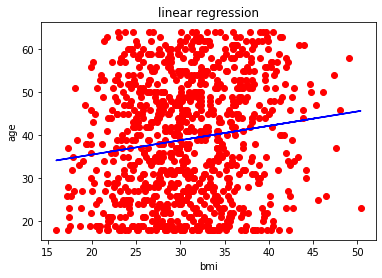

In [91]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,lr.predict(X_train),color="blue")
plt.xlabel('bmi')
plt.ylabel('age')
plt.title('linear regression')
plt.show()

POLYNOMIAL REGRESSION

Text(0, 0.5, 'age')

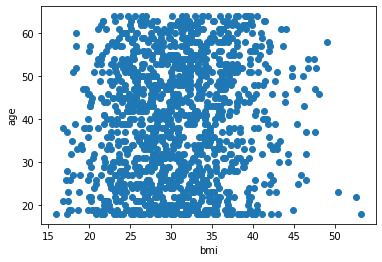

In [92]:
plt.scatter(X,y)
plt.xlabel("bmi")
plt.ylabel("age")

In [93]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

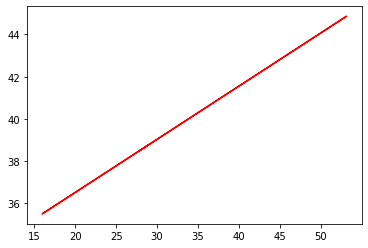

Age vs Bmi is:  [232.89345116]


In [95]:
y_head = lr.predict(X)
plt.plot(X,y_head,color= "red",label="linear")
plt.show()
print("Age vs Bmi is: ", lr.predict([[800]]))

In [97]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

In [99]:
pr = PolynomialFeatures(degree = 2)
X_p = pr.fit_transform(X)
X_p

array([[1.0000000e+00, 2.7900000e+01, 7.7841000e+02],
       [1.0000000e+00, 3.3770000e+01, 1.1404129e+03],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03],
       ...,
       [1.0000000e+00, 3.6850000e+01, 1.3579225e+03],
       [1.0000000e+00, 2.5800000e+01, 6.6564000e+02],
       [1.0000000e+00, 2.9070000e+01, 8.4506490e+02]])

In [101]:
lr2 = LinearRegression()
lr2.fit(X_p,y)

LinearRegression()

In [102]:
y_head2 = lr2.predict(X_p)
y_head2

array([38.90984387, 40.5187311 , 40.370932  , ..., 40.91894504,
       38.0646998 , 39.31909071])

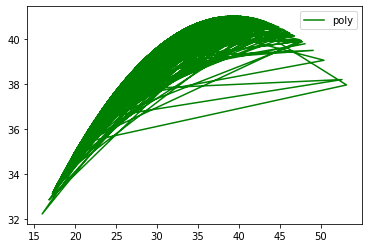

In [103]:
plt.plot(X,y_head2,color = "green",label = "poly")
plt.legend()
plt.show()

DECISION TREE

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [113]:
DF

,age,bmi,children,charges,Male,northwest,southeast,southwest,Smoke
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
DF.isna().sum()

age          0
bmi          0
children     0
charges      0
Male         0
northwest    0
southeast    0
southwest    0
Smoke        0
dtype: int64

In [116]:
DF.columns

Index(['age', 'bmi', 'children', 'charges', 'Male', 'northwest', 'southeast',
       'southwest', 'Smoke'],
      dtype='object')

In [118]:
X = DF.drop('children',axis =1)
y = DF['children']
X
y

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [122]:
X_train

,age,bmi,charges,Male,northwest,southeast,southwest,Smoke
744,50,26.410,8827.20990,1,1,0,0,0
363,21,26.400,2597.77900,0,0,0,1,0
10,25,26.220,2721.32080,1,0,0,0,0
970,50,28.160,10702.64240,0,0,1,0,0
634,51,39.700,9391.34600,1,0,0,1,0
...,...,...,...,...,...,...,...,...
715,60,28.900,12146.97100,1,0,0,1,0
905,26,29.355,4564.19145,0,0,0,0,0
1096,51,34.960,44641.19740,0,0,0,0,1
235,40,22.220,19444.26580,0,0,1,0,1


In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [124]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [125]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
prediction_dt = tree.predict(X_test)
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67       175
           1       0.34      0.45      0.39        91
           2       0.40      0.35      0.37        82
           3       0.35      0.40      0.38        42
           4       0.20      0.10      0.13        10
           5       0.29      1.00      0.44         2

    accuracy                           0.49       402
   macro avg       0.38      0.49      0.40       402
weighted avg       0.52      0.49      0.50       402



In [126]:
print(confusion_matrix(y_test, prediction_dt))

[[108  44  16   5   1   1]
 [ 25  41  20   3   2   0]
 [  4  23  29  22   1   3]
 [  8   9   8  17   0   0]
 [  4   3   0   1   1   1]
 [  0   0   0   0   0   2]]


In [127]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [128]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [129]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2550.43
|   |--- feature_2 <= 1709.98
|   |   |--- class: 0
|   |--- feature_2 >  1709.98
|   |   |--- feature_2 <= 1727.66
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  1727.66
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_2 <= 2200.96
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  2200.96
|   |   |   |   |   |--- feature_2 <= 2202.28
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  2202.28
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 2342.03
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  2342.03
|   |   |   |   |   |   |   |   |   |--- class: 0


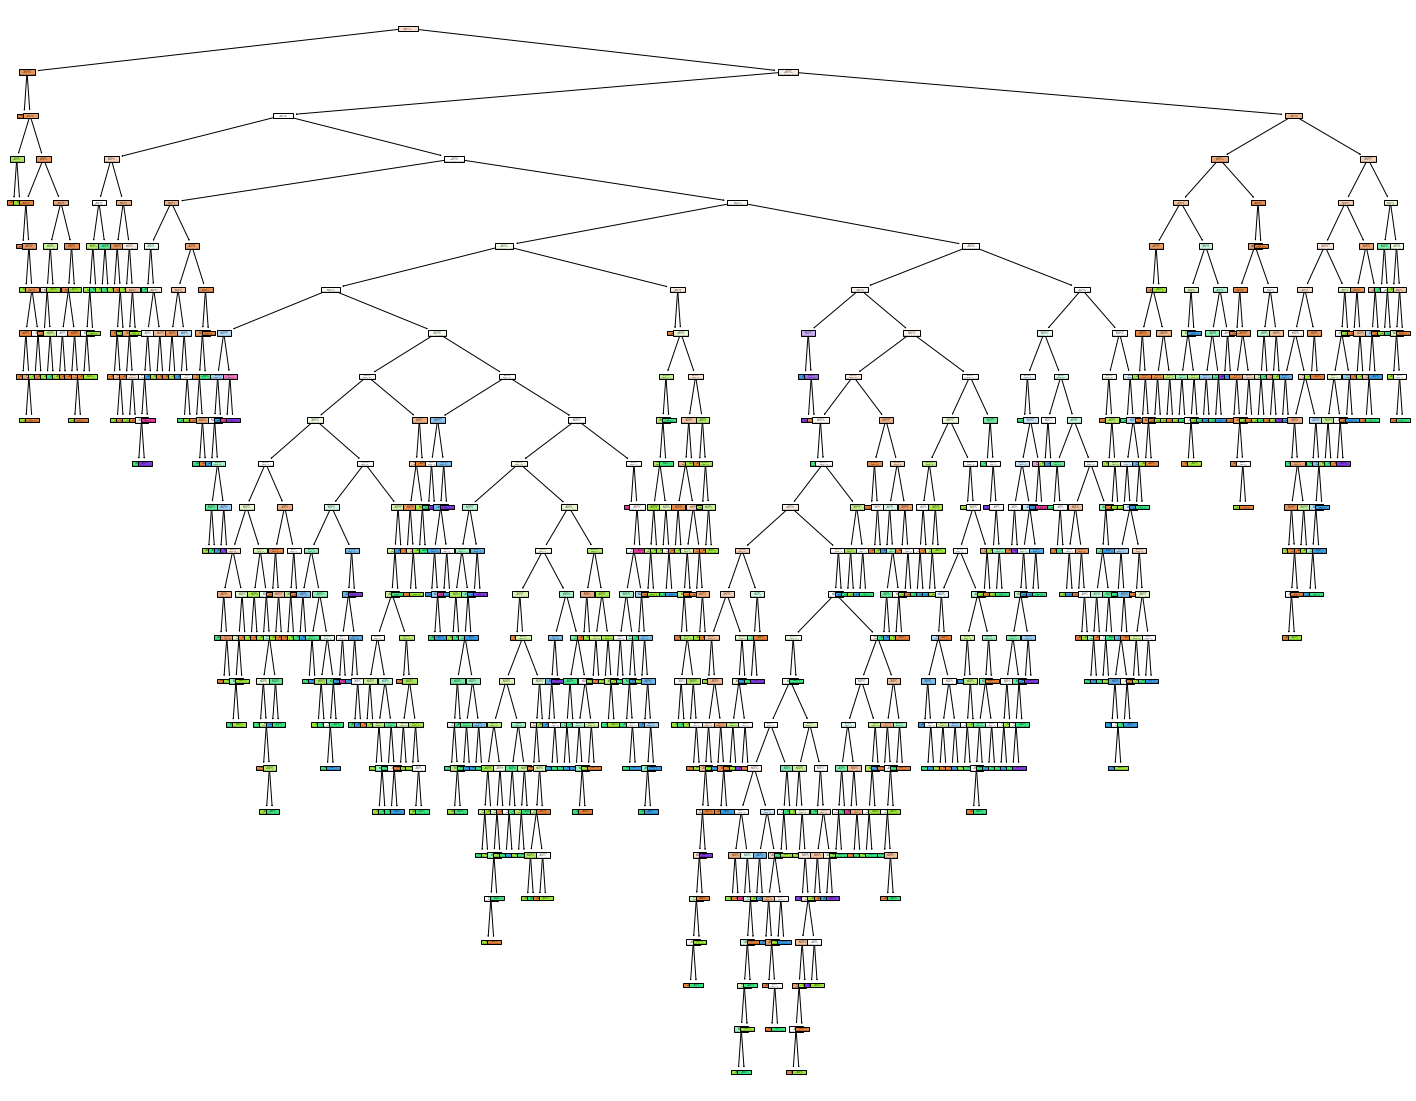

In [132]:
fig = plt.figure(figsize=(25,20))
q = tree.plot_tree(clf,feature_names=DF.children,filled=True)